# NOVARTIS DATA SCIENCE HIRING CHALLENGE

In [1]:
#importing 
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_novartis_train = pd.read_csv(r"Train.csv")
df_novartis_test = pd.read_csv(r"Test.csv")

In [3]:
#CHECK FOR MISSING VALUES IN THE DATASETS
print('The missing values for training dataset :',df_novartis_train.isna().sum())
print('The missing values for test dataset :',df_novartis_test.isna().sum())

The missing values for training dataset : INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64
The missing values for test dataset : INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64


In [4]:
df_novartis_train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [5]:
#Filling the missing values with mode=1
df_novartis_train = df_novartis_train.fillna(1)
df_novartis_test = df_novartis_test.fillna(1)

In [6]:
df_novartis_train.dtypes

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE      int64
dtype: object

# PERFORMING EDA

In [7]:
X = df_novartis_train.drop(['INCIDENT_ID','DATE','MULTIPLE_OFFENSE'],axis=1)
Y = df_novartis_train.values[:,17]

X_stat = X
Y_stat = Y
Y_stat = Y_stat.astype(int)

In [8]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_stat,Y_stat)

In [9]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_stat.columns)

In [10]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [11]:
featureScores.sort_values('Score',ascending=False).head(10)

,Specs,Score
10,X_11,11017.611286
9,X_10,1412.988215
11,X_12,423.104927
1,X_2,166.484588
2,X_3,164.308071
13,X_14,143.417298
14,X_15,101.155023
7,X_8,57.775525
0,X_1,20.129959
12,X_13,9.037986


# Feature Importance

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_stat,Y_stat)

ExtraTreesClassifier()

In [13]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00683459 0.02589249 0.02755249 0.01962145 0.01592339 0.02732699
 0.02478657 0.03449047 0.02337992 0.23898601 0.23422294 0.11199198
 0.03687375 0.03446424 0.13765272]


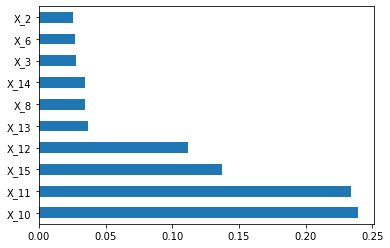

In [14]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

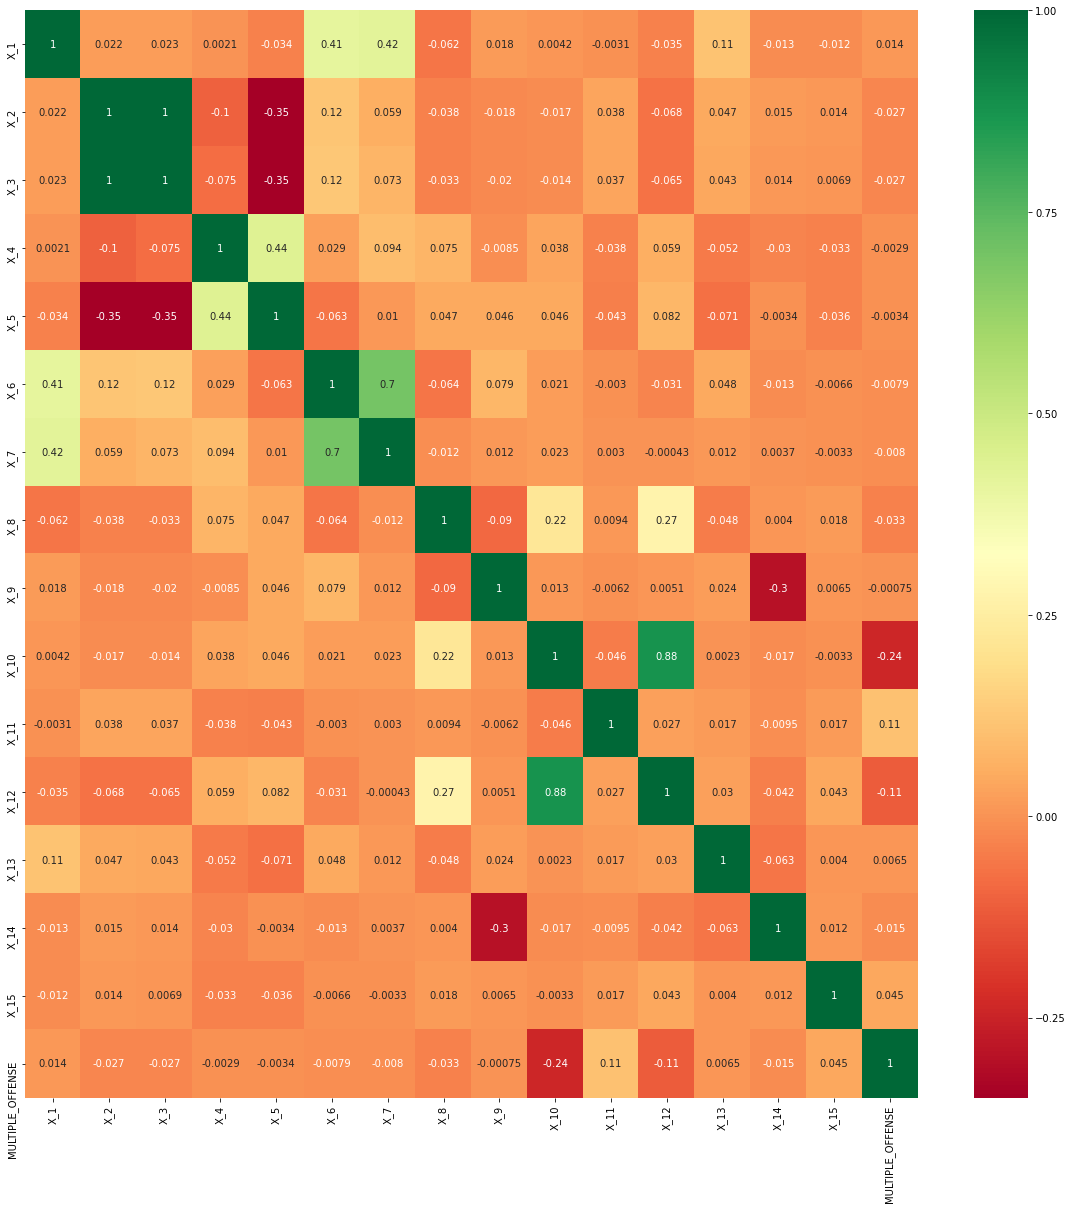

In [15]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_novartis_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_novartis_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

On the basis of analysis from the above statistical methods, we are dropping the following columns: 'X_1','X_4','X_5','X_6','X_7','X_9'

In [17]:
df_train = df_novartis_train.drop(columns=[ 'X_1','X_4','X_5','X_6','X_7','X_9','INCIDENT_ID','DATE'],axis=1)
df_test = df_novartis_test.drop(columns=[ 'X_1','X_4','X_5','X_6','X_7','X_9','INCIDENT_ID','DATE'],axis=1)

In [18]:
#CHECKING FOR CLASS BALANCE
fraud = df_train[df_novartis_train['MULTIPLE_OFFENSE'] == 1]
normal = df_train[df_novartis_train['MULTIPLE_OFFENSE'] == 0]
fraud.shape,normal.shape

((22788, 10), (1068, 10))

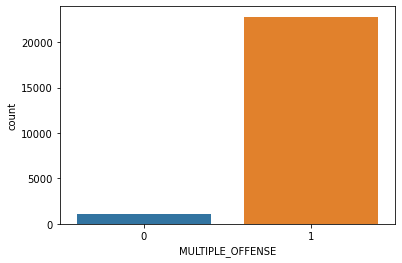

In [20]:
#PLOTTING THE CLASS BALANCE
sns.countplot(df_train.MULTIPLE_OFFENSE)

Since this is a case of imbalanced dataset, we will oversample the data, and then fit into the model

In [21]:
X = df_train.drop(columns='MULTIPLE_OFFENSE', axis=1)
Y = df_train['MULTIPLE_OFFENSE']
X_test = df_test

In [22]:
#OVERSAMPLING 
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_res,y_res = smk.fit_sample(X,Y)
X_res.shape,y_res.shape

((45552, 9), (45552,))

In [23]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Reshaped dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 22788, 0: 1068})
Reshaped dataset shape Counter({0: 22776, 1: 22776})


# Lets plot a pairplot to see what model can be deployed for classifying the data

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


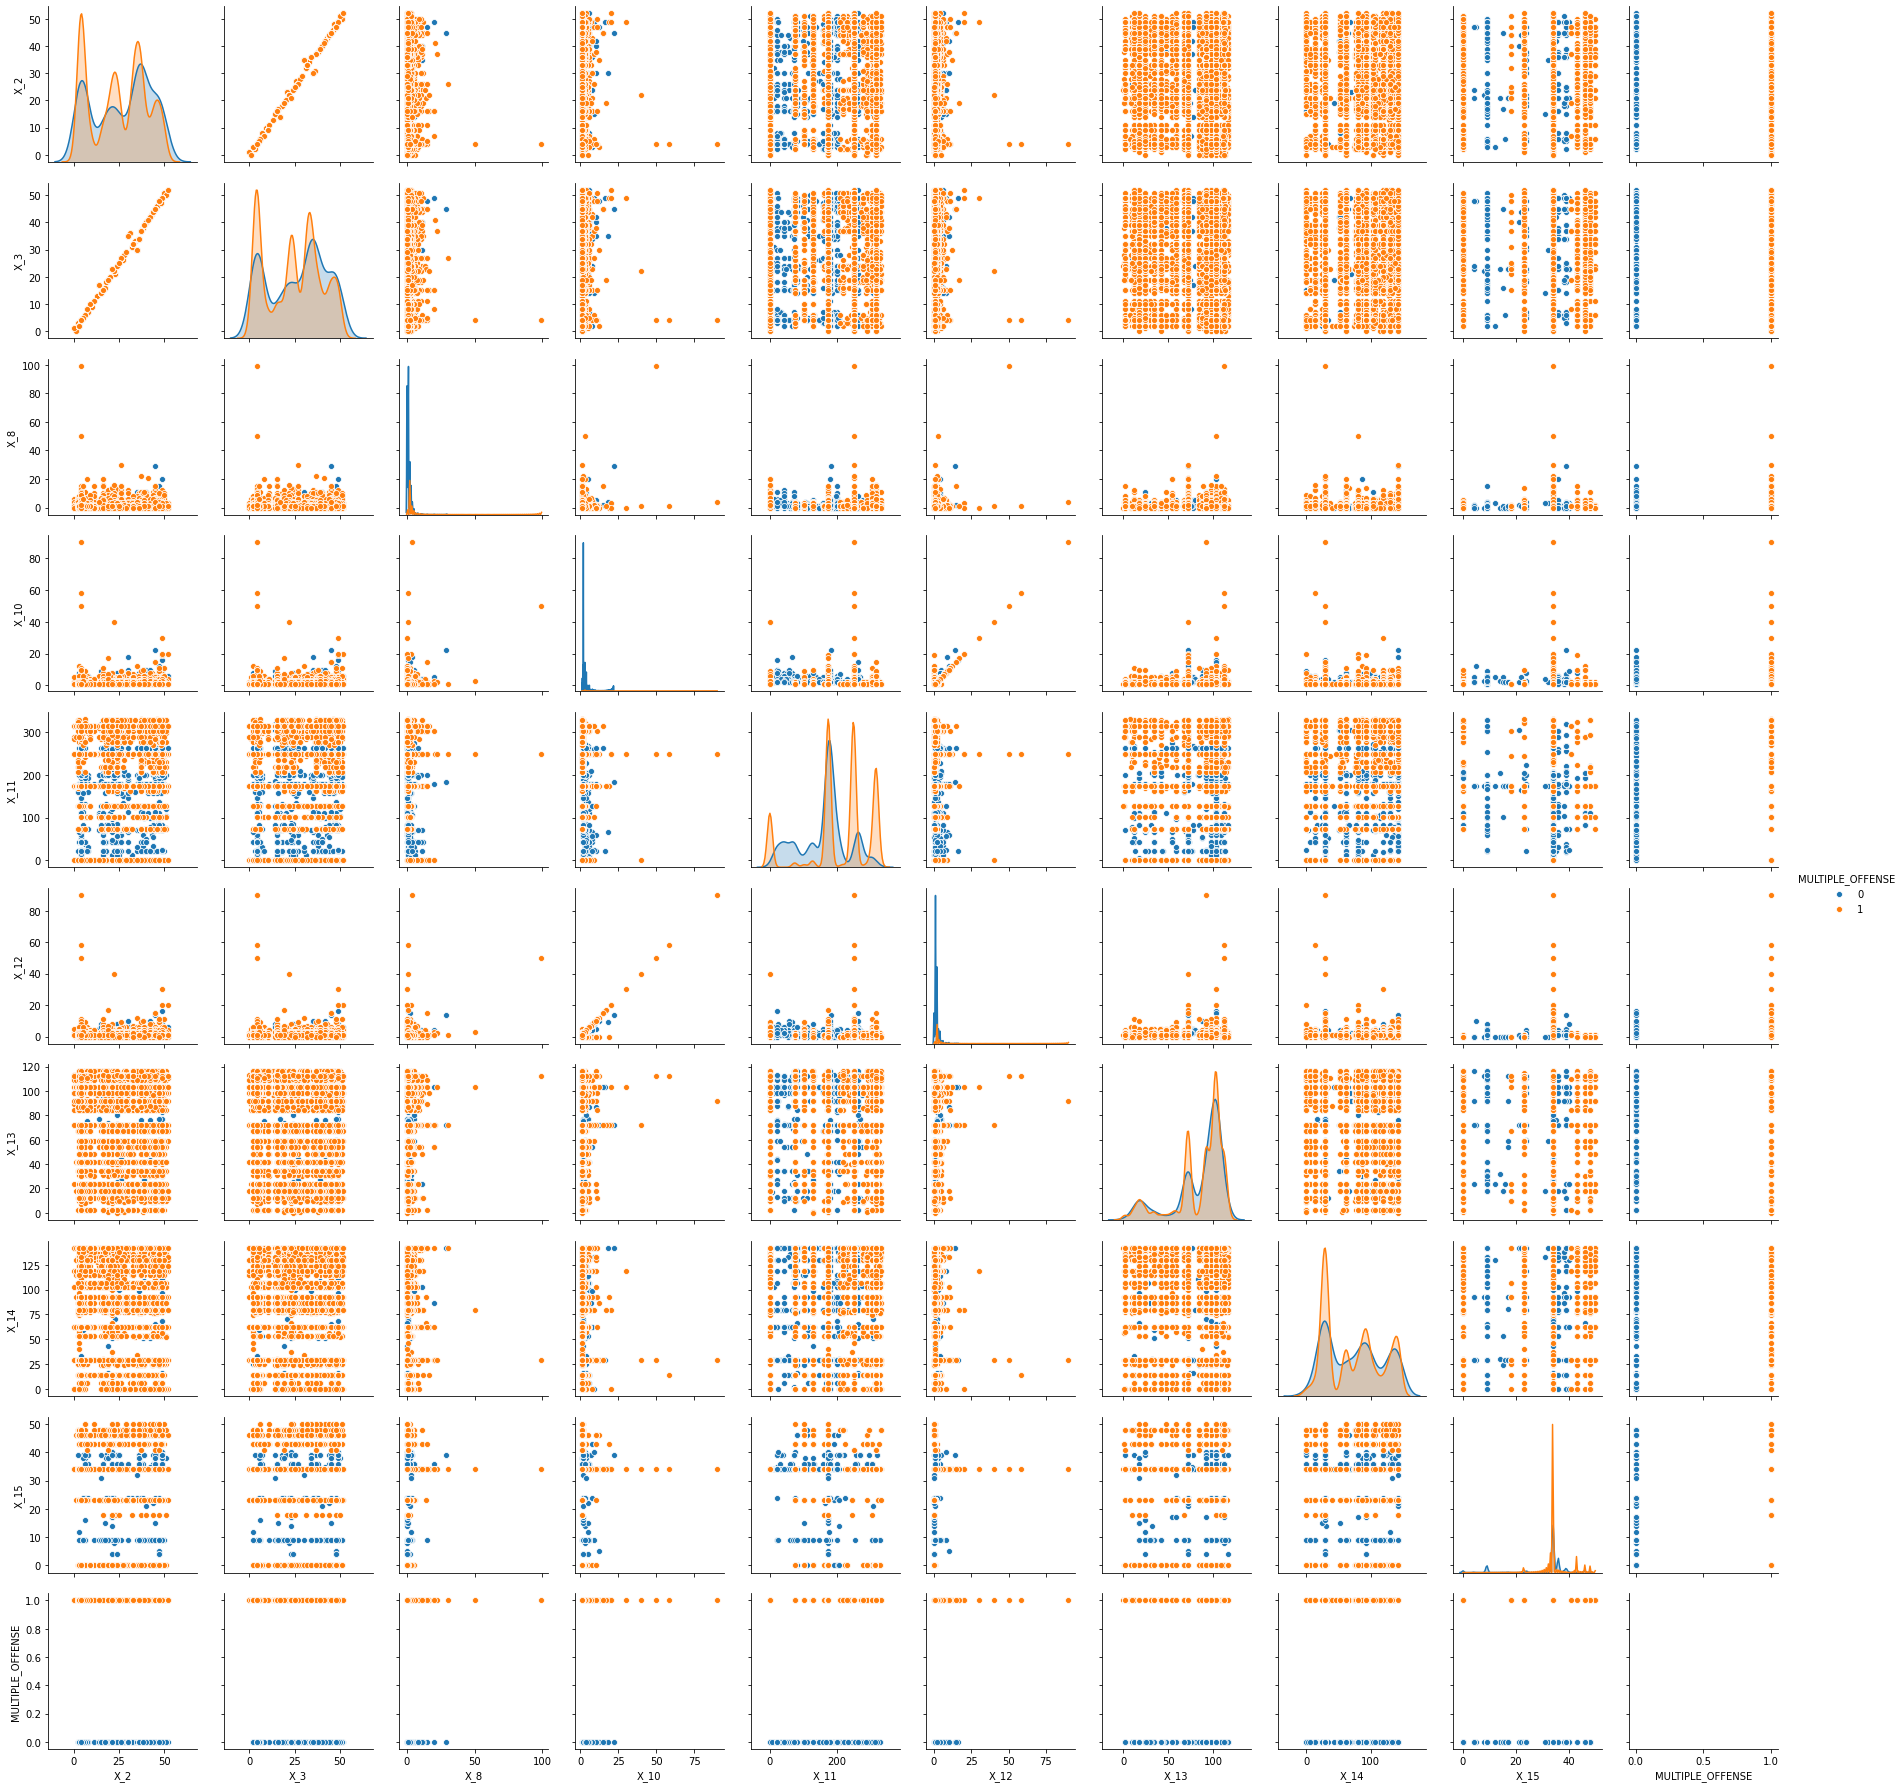

In [24]:
#Plot a pairplot
sns.pairplot(df_train,hue='MULTIPLE_OFFENSE')

Here, we can see that the classes are overlapping too much, so we will go with knn, decision trees or randomforest classifier

In [192]:
#Build machine learning classifier for prediction
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(random_state=1)
eclf = VotingClassifier(estimators=[('rf', clf1)],voting='hard'
                       )
params = { 'rf__n_estimators': [10,100],
         'rf__max_depth': [1,5,8,15,25],
          }

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5,verbose = 1,n_jobs = -1)

In [205]:
grid = grid.fit(X_res, y_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.5s finished


In [206]:
y_pred = grid.predict(X_test)
predictions = pd.DataFrame(y_pred)
predictions = predictions.rename(columns={0:'MULTIPLE_OFFENSE'})

testing_dataframe = pd.concat([df_novartis_test.INCIDENT_ID, predictions], axis=1)
testing_dataframe.to_csv('Result_votingclassifier_statsapplied_rf_final.csv', encoding='utf-8', index=False)

# With feature engineering, oversampling and voting classifier with random forest, Recall score achieved is 99.29 